In [29]:
import numpy as np
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
import os

In [2]:
checkpoint_path = './train_log/train_5m/model-13410'

In [3]:
!ls $checkpoint_path

ls: cannot access './train_log/train_5m/model-13410': No such file or directory


In [6]:
print_tensors_in_checkpoint_file(file_name=checkpoint_path, tensor_name='encode/fully_connected/weights:0', all_tensors = True)


tensor_name:  EMA/QueueInput/queue_size
47.942986
tensor_name:  EMA/QueueInput/queue_size/biased
47.942986
tensor_name:  EMA/QueueInput/queue_size/local_step
13410.0
tensor_name:  EMA/encode_2/latent_loss
0.0321565
tensor_name:  EMA/encode_2/latent_loss/biased
0.0321565
tensor_name:  EMA/encode_2/latent_loss/local_step
13410.0
tensor_name:  EMA/predict_trend/accuracy_
0.8473595
tensor_name:  EMA/predict_trend/accuracy_/biased
0.8473595
tensor_name:  EMA/predict_trend/accuracy_/local_step
13410.0
tensor_name:  decode/fully_connected/biases
[ 0.12928416  0.3401158   0.24152659 ... -0.26880303  0.16477679
 -0.4429528 ]
tensor_name:  decode/fully_connected/biases/Adam
[ 2.92509213e-07 -8.31515266e-08  2.03345127e-08 ...  9.94227889e-07
  1.08566944e-07 -1.99336412e-07]
tensor_name:  decode/fully_connected/biases/Adam_1
[6.6810472e-12 1.1441953e-11 6.6918853e-12 ... 2.8321350e-11 9.2336399e-12
 4.6079919e-12]
tensor_name:  decode/fully_connected/weights
[[ 0.05072907  0.03719693 -0.00804307

In [15]:
from tensorflow.python import pywrap_tensorflow
reader = pywrap_tensorflow.NewCheckpointReader(checkpoint_path)

fc_W_l0 = reader.get_tensor('encode/fully_connected/weights')

In [28]:
fc_W_l0.shape

(46, 32)

In [31]:
fc_W_l0_T = np.transpose(fc_W_l0)
fc_W_l0_T.shape

(32, 46)

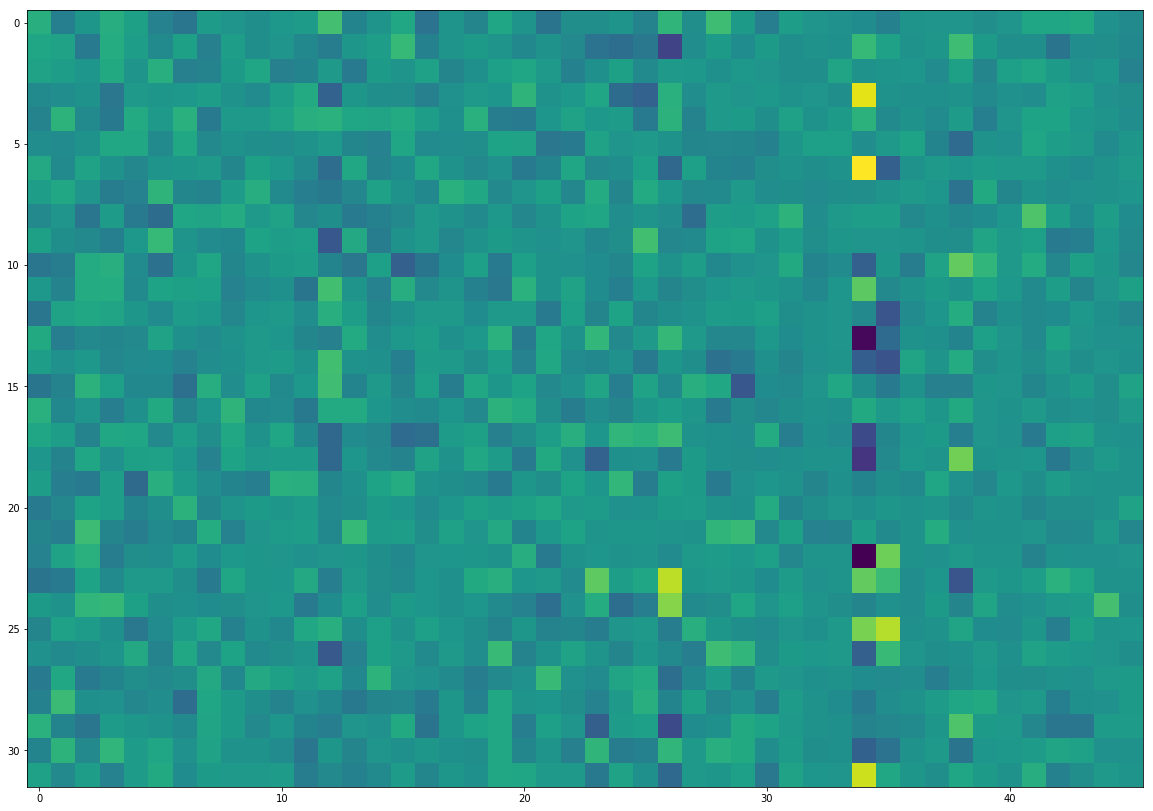

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

plt.imshow(fc_W_l0_T)
plt.show()

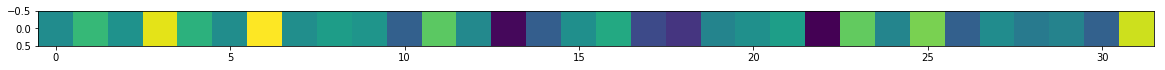

In [55]:
plt.figure(figsize=(20,15))

plt.imshow([fc_W_l0_T[:,34]])
plt.show()

In [54]:
from VAE.extra_info_params import get_default_hparams

In [56]:
hps = get_default_hparams()

In [58]:
hps.attributes_normalize_mean[34]

'_1d_price_avg'

In [100]:
hps.attributes_normalize_mean[:7]

['Open', 'High', 'Low', 'Close', 'Volume', 'N_buy', 'N_sell']

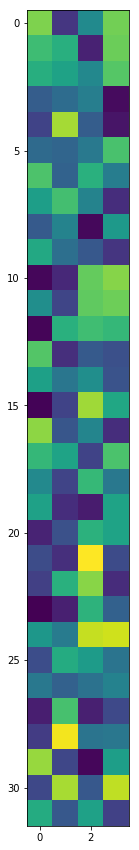

In [62]:
plt.figure(figsize=(20,15))

plt.imshow(fc_W_l0_T[:,0:4])
plt.show()

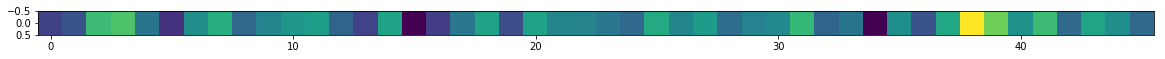

In [78]:
plt.figure(figsize=(20,15))

plt.imshow(fc_W_l0_T[10:11,:])
plt.show()

# Feature for Close - Open, Low - High

In [81]:
fc_W_l0_T[10,:]

array([-0.24033913, -0.1831764 ,  0.19435196,  0.22610217, -0.06700459,
       -0.28120238,  0.02756501,  0.14468504, -0.11310136, -0.01213964,
        0.05642846,  0.08507348, -0.1261226 , -0.23073064,  0.09891403,
       -0.40947542, -0.24957101, -0.05746415,  0.09751457, -0.19916113,
        0.09879402, -0.00792782, -0.01587087, -0.05519234, -0.10929754,
        0.12859066, -0.00450151,  0.07876984, -0.09472797, -0.01646555,
        0.00953976,  0.1783875 , -0.12412956, -0.06716365, -0.40884072,
        0.03034842, -0.18199018,  0.12005124,  0.47340536,  0.2773679 ,
        0.04062764,  0.19748801, -0.10385206,  0.10603979,  0.02988441,
       -0.10405117], dtype=float32)

In [89]:
W_sq = fc_W_l0_T * fc_W_l0_T

In [93]:
W_sq_sum = np.sum(W_sq, axis=-1)

In [94]:
np.argmin(W_sq_sum)

20

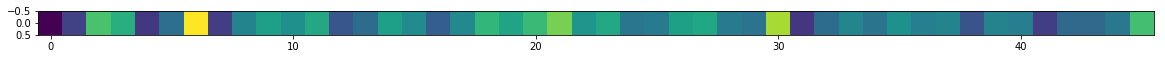

In [98]:
plt.figure(figsize=(20,15))

plt.imshow(fc_W_l0_T[20:21,:])
plt.show()

In [103]:
hps.attributes_normalize_mean[7:10]

['buy_amount_avg', 'sell_amount_avg', 'buy_amount_std']